# Week1_강은서_데이터분석과제

외국인 입국과 관련한 데이터, 통계청에서 '외래객 입국' 2020년 5월 자료 이용
http://kosis.kr/statHtml/statHtml.do?orgId=314&tblId=DT_TGT_ENT_AGG_MONTH&vw_cd=MT_ZTITLE&list_id=H2_19&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
*세계관광기구(UNWTO) 권고안에 근거하여 방문객(visitor) 기준으로 작성하는데, 법무부 자료 중에서 외국인 입국자와 재외국민 입국자, 선원 ㆍ 승무원을 합한 것임. 단, 방한 외국인 입국자 중에서 외교, 군인, 영주, 영주가족, 방문동거, 거주 체류자격의 외국인 입국자는 방문객으로 볼 수 없어서 제외함

※ 법무부의 ‘입국자’는 외국인 입국자와 국민 입국자이며, ‘외국인 입국자’는 국적이 한국이 아닌 자로 선원 ㆍ 승무원은 별도로 발표하고 있음

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

In [2]:
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호 오류 보정
plt.rcParams['font.family'] = 'HYGothic-Medium' #한글 폰트는 HYGothic체로

In [3]:
foreigners= pd.read_excel('외래객_입국목적별_국적별_20200729202606.xlsx',thousands = ',',encoding='CP949') 
#CSV 파일 읽어올 때 UTF-8에러가 난다면 encoding을 CP949로 바꾸어 사용해보기...
#디코드 에러는 https://rfriend.tistory.com/250 참고해서 해결

## 1. 필요한 정보만 뽑아내기

In [4]:
foreigners #여기서 헤드는 날짜를 나타내는것이 아니라 불러오는 과정에서 이상하게 바뀐것
#columnname 새로 지정

,국적별(1),2020. 05,2020. 05.1,2020. 05.2,2020. 05.3,2020. 05.4,2020. 05.5,2020. 05.6,2020. 05.7,2020. 05.8
0,국적별(1),계 (명),관광 (명),상용 (명),공용 (명),유학연수 (명),기타 (명),전년동기 (명),성장률 (%),구성비 (%)
1,계,30861,6111,435,253,2192,21870,-,-,-
2,전년동기,1485684,1233562,15020,6457,20702,209943,-,-,-
3,아시아주,13302,2008,269,37,2146,8842,1223905,-99,43
4,대만,189,31,8,3,33,114,101779,-100,1
...,...,...,...,...,...,...,...,...,...,...
62,남아프리카공화국,29,1,0,3,0,25,1064,-97,0
63,아프리카 기타,131,3,1,3,6,118,3214,-96,0
64,기타대륙,4,1,0,0,0,3,72,-94,0
65,국적미상,4,1,0,0,0,3,72,-94,0


In [5]:
foreigners= foreigners.drop (foreigners.index[0])
foreigners.columns=['국적','계','관광','상용','공용','유학연수','기타', '전년동기','성장률','구성비']

In [6]:
foreigners

,국적,계,관광,상용,공용,유학연수,기타,전년동기,성장률,구성비
1,계,30861,6111,435,253,2192,21870,-,-,-
2,전년동기,1485684,1233562,15020,6457,20702,209943,-,-,-
3,아시아주,13302,2008,269,37,2146,8842,1223905,-99,43
4,대만,189,31,8,3,33,114,101779,-100,1
5,일본,413,45,105,3,41,219,286273,-100,1
...,...,...,...,...,...,...,...,...,...,...
62,남아프리카공화국,29,1,0,3,0,25,1064,-97,0
63,아프리카 기타,131,3,1,3,6,118,3214,-96,0
64,기타대륙,4,1,0,0,0,3,72,-94,0
65,국적미상,4,1,0,0,0,3,72,-94,0


In [7]:
foreigners= foreigners.drop(['전년동기','성장률','구성비'], axis=1)
foreigners= foreigners.drop(foreigners.index[1]) #전년동기 성장률은 보지 않기로 하고 제외

In [8]:
foreigners

,국적,계,관광,상용,공용,유학연수,기타
1,계,30861,6111,435,253,2192,21870
3,아시아주,13302,2008,269,37,2146,8842
4,대만,189,31,8,3,33,114
5,일본,413,45,105,3,41,219
6,홍콩,24,6,5,0,2,11
...,...,...,...,...,...,...,...
62,남아프리카공화국,29,1,0,3,0,25
63,아프리카 기타,131,3,1,3,6,118
64,기타대륙,4,1,0,0,0,3
65,국적미상,4,1,0,0,0,3


## 2. 대륙별 방문 인원 bar chart/pie chart와 국적별 방문인원 bar chart

In [9]:
sample1=foreigners.loc[[3,27,33,57,61,64,65,66], :]
sample1

,국적,계,관광,상용,공용,유학연수,기타
3,아시아주,13302,2008,269,37,2146,8842
27,미주,9622,3079,44,193,13,6293
33,구주,6801,984,116,14,26,5661
57,대양주,182,35,5,3,1,138
61,아프리카,160,4,1,6,6,143
64,기타대륙,4,1,0,0,0,3
65,국적미상,4,1,0,0,0,3
66,교포,790,0,0,0,0,790


In [10]:
sample1 = sample1.set_index('국적')
sample1

,계,관광,상용,공용,유학연수,기타
국적,,,,,,
아시아주,13302,2008,269,37,2146,8842
미주,9622,3079,44,193,13,6293
구주,6801,984,116,14,26,5661
대양주,182,35,5,3,1,138
아프리카,160,4,1,6,6,143
기타대륙,4,1,0,0,0,3
국적미상,4,1,0,0,0,3
교포,790,0,0,0,0,790


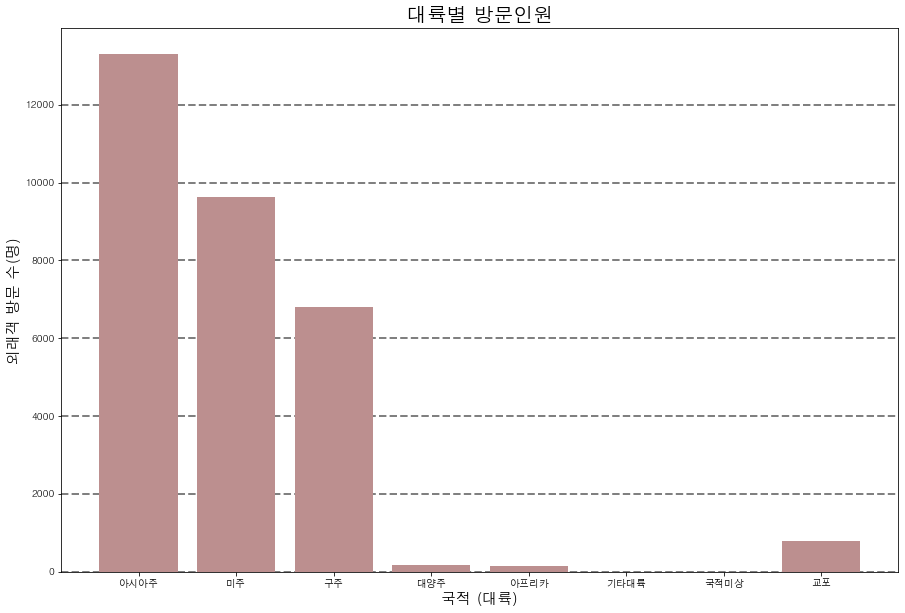

In [11]:
fig,ax=plt.subplots(figsize=(15,10))
ax.grid(True, color='gray', linestyle='--', linewidth=2, axis='y', zorder=0)
ax.bar(sample1.index, sample1['계'],color='rosybrown' ,zorder=2)
ax.set_xlabel('국적 (대륙)', fontsize=15)
ax.set_ylabel('외래객 방문 수(명)',fontsize=15)
ax.set_title('대륙별 방문인원',fontsize=20)
plt.show()

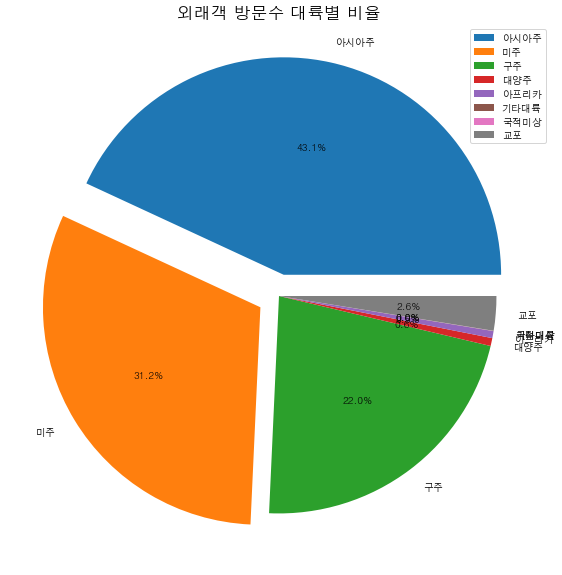

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sample1.iloc[:, 0], labels=sample1.index[:], autopct='%1.1f%%',explode=(0.1, 0.1, 0, 0, 0,0,0,0))
ax.set_title('외래객 방문수 대륙별 비율', fontsize=17),
ax.legend()
plt.show()

In [13]:
sample2=foreigners.drop([1,3,27,33,57,61,64,65,66])

In [14]:
sample2 = sample2.set_index('국적')
sample2

,계,관광,상용,공용,유학연수,기타
국적,,,,,,
대만,189,31,8,3,33,114
일본,413,45,105,3,41,219
홍콩,24,6,5,0,2,11
태국,195,25,7,0,13,150
말레이시아,90,2,8,0,8,72
필리핀,1539,725,1,12,4,797
인도네시아,1755,581,3,5,9,1157
싱가포르,49,6,10,0,3,30
미얀마,701,178,1,0,6,516


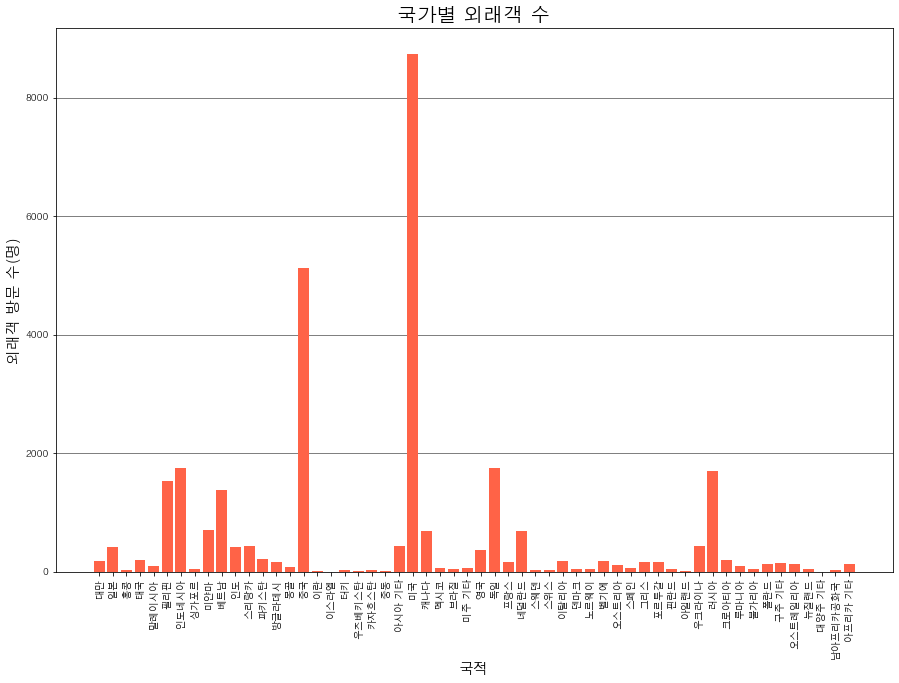

In [15]:
fig,ax=plt.subplots(figsize=(15,10))
ax.grid(True, color='gray', linestyle='-', linewidth=1, axis='y', zorder=0)
ax.bar(sample2.index, sample2['계'],color='tomato' ,zorder=2)
ax.set_xticklabels(sample2.index, rotation=90)
ax.set_xlabel('국적', fontsize=15)
ax.set_ylabel('외래객 방문 수(명)',fontsize=15)
ax.set_title('국가별 외래객 수',fontsize=20)
plt.show()

가장 많은 것은 미국, 그 다음이 중국. 

## 3. 월별 외래객 시계열 분석

In [19]:
foreigner2= pd.read_excel('외래객_입국목적별_국적별_월별시계열.xlsx',thousands = ',',encoding='CP949') 
foreigner2

,국적별(1),2016. 06,2016. 07,2016. 08,2016. 09,2016. 10,2016. 11,2016. 12,2017. 01,2017. 02,...,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05
0,국적별(1),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),...,계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명),계 (명)
1,계,1554413,1703495,1664303,1523928,1587797,1309055,1343398,1220695,1252080,...,1586299,1459664,1656195,1456429,1456888,1272708,685212,83497,29415,30861
2,아시아주,1319413,1471066,1443009,1291229,1331114,1098057,1148226,1040034,1084723,...,1328344,1192943,1365292,1225162,1250667,1081229,552449,52407,17116,13302
3,미주,109777,101861,92162,99676,109407,88973,84987,74624,69439,...,112483,119156,131722,106706,99484,87492,56817,14110,7029,9622
4,구주,80062,84081,87018,84015,97839,79193,64177,67512,65581,...,104736,102751,114725,87560,73513,73181,55245,13086,4135,6801
5,대양주,16478,18921,12830,18528,17410,15102,19609,15441,10856,...,17368,21830,20375,16996,23896,17755,8892,1085,235,182
6,아프리카,4664,5587,6413,5537,5881,4544,3575,3601,4340,...,6751,6316,6102,4741,4000,4198,4160,1183,199,160
7,기타대륙,66,62,52,65,50,37,59,55,57,...,57,49,40,31,47,61,40,11,3,4
8,국적미상,66,62,52,65,50,37,59,55,57,...,57,49,40,31,47,61,40,11,3,4


In [20]:
foreigner2= foreigner2.drop (foreigner2.index[0])
foreigner2= foreigner2.set_index('국적별(1)')
foreigner2

,2016. 06,2016. 07,2016. 08,2016. 09,2016. 10,2016. 11,2016. 12,2017. 01,2017. 02,2017. 03,...,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05
국적별(1),,,,,,,,,,,,,,,,,,,,,
계,1554413,1703495,1664303,1523928,1587797,1309055,1343398,1220695,1252080,1233640,...,1586299,1459664,1656195,1456429,1456888,1272708,685212,83497,29415,30861
아시아주,1319413,1471066,1443009,1291229,1331114,1098057,1148226,1040034,1084723,1008026,...,1328344,1192943,1365292,1225162,1250667,1081229,552449,52407,17116,13302
미주,109777,101861,92162,99676,109407,88973,84987,74624,69439,94387,...,112483,119156,131722,106706,99484,87492,56817,14110,7029,9622
구주,80062,84081,87018,84015,97839,79193,64177,67512,65581,86555,...,104736,102751,114725,87560,73513,73181,55245,13086,4135,6801
대양주,16478,18921,12830,18528,17410,15102,19609,15441,10856,15562,...,17368,21830,20375,16996,23896,17755,8892,1085,235,182
아프리카,4664,5587,6413,5537,5881,4544,3575,3601,4340,4243,...,6751,6316,6102,4741,4000,4198,4160,1183,199,160
기타대륙,66,62,52,65,50,37,59,55,57,81,...,57,49,40,31,47,61,40,11,3,4
국적미상,66,62,52,65,50,37,59,55,57,81,...,57,49,40,31,47,61,40,11,3,4


In [22]:
sample3= foreigner2.transpose()
sample3

국적별(1),계,아시아주,미주,구주,대양주,아프리카,기타대륙,국적미상
2016. 06,1554413,1319413,109777,80062,16478,4664,66,66
2016. 07,1703495,1471066,101861,84081,18921,5587,62,62
2016. 08,1664303,1443009,92162,87018,12830,6413,52,52
2016. 09,1523928,1291229,99676,84015,18528,5537,65,65
2016. 10,1587797,1331114,109407,97839,17410,5881,50,50
2016. 11,1309055,1098057,88973,79193,15102,4544,37,37
2016. 12,1343398,1148226,84987,64177,19609,3575,59,59
2017. 01,1220695,1040034,74624,67512,15441,3601,55,55
2017. 02,1252080,1084723,69439,65581,10856,4340,57,57
2017. 03,1233640,1008026,94387,86555,15562,4243,81,81


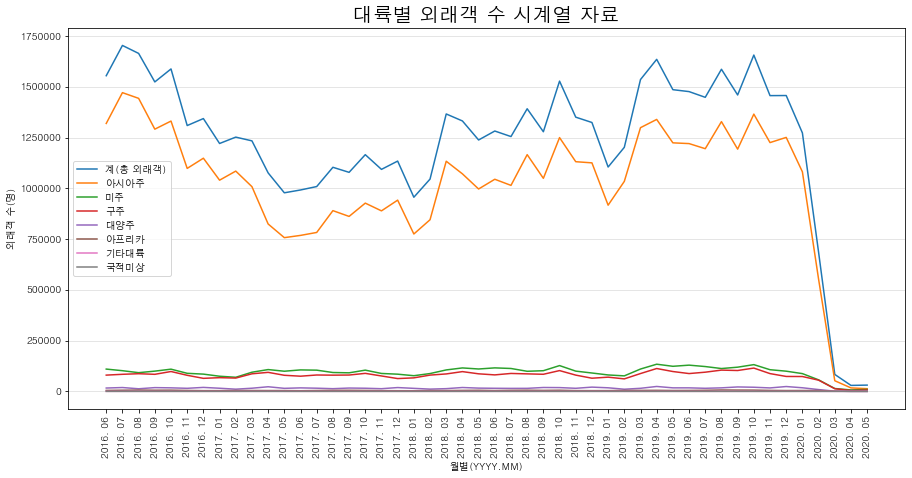

In [25]:
fig,ax=plt.subplots(figsize=(15,7))
ax.grid(True, color='gray', linewidth=1, axis='y', alpha=0.2, zorder=0)
ax.plot(sample3.index,sample3['계'],label='계(총 외래객)')
ax.plot(sample3.index,sample3['아시아주'],label='아시아주')
ax.plot(sample3.index,sample3['미주'],label='미주')
ax.plot(sample3.index,sample3['구주'],label='구주')
ax.plot(sample3.index,sample3['대양주'],label='대양주')
ax.plot(sample3.index,sample3['아프리카'],label='아프리카')
ax.plot(sample3.index,sample3['기타대륙'],label='기타대륙')
ax.plot(sample3.index,sample3['국적미상'],label='국적미상')


ax.set_xticklabels(sample3.index,rotation=90)
ax.set_xlabel('월별(YYYY.MM)')
ax.set_ylabel('외래객 수(명)')
ax.set_title('대륙별 외래객 수 시계열 자료',fontsize=20)
ax.legend()
plt.show()

코로나로 인해 2020.02부터 외래객 수가 급격하게 감소한 것을 확인할 수 있다.